
# Assignment No 2a
#### Assignment Credit 
###### *Dr. Sibt ul Hussain*
----
## Goal

Your goal in this assigment is to implement a Gaussian Bayes Classifier.

There are two different flavours of Bayes Rule

- Naive Bayes
- **Gaussian Bayes**


### Instructions
- Do not modify the block with test cases.
- Do not tailor your solution to only pass the test cases. We will use different data for grading so keep your solution generic.
- Passing all the cases means you are in reight direction, but does not ensure 100% marks, there may be some other cases hidden, so carefully read the question statement and implement all the necessory functionality.
- <p style="color:#ff0000">Plagiarism of any kind, (including internet) will lead to zero marks.</p>

#### Libraries
Ther are two additional libraries used which are not included in Anaconda package, nose and seaborn. You can install them using the following commands :
```sh
conda install -c anaconda nose=1.3.7
conda install -c anaconda seaborn=0.7.1
```
Version of different libraries used are listed below:
- Matplotlib **1.5.1**
- Pandas **0.18.1**
- Numpy **1.11.1**
- Scipy **0.17.1**
- Seaborn **0.7.1**

Code for checking version info is present in cell below.

#### Dead Kernal
In case kernel does not connect, and shows a dead kernal meggese in read : 
- Go to Kernal -> Change kernal, and choose any of the available kernels.
- Press ctrl + s and close the tab.
- Open the notebook again and the kernel will connect. If it still does not connect then go to Kernel -> restart.

**Note : ** Accuracies may slightly vary due to randomness in train-text split. 

In [113]:
%pylab inline
import scipy.stats
import pandas as pd
from collections import defaultdict
import seaborn as sns
#many important functions are already written and provided in tools.py 
# please have a look at these functions....
import tools as t


plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [115]:
# conda install nose --upgrade

In [117]:
print ("Matplotlib version : ", matplotlib.__version__)
print ("Pandas version : ", pd.__version__)
print ("Numpy version : ", np.__version__)
print ("Scipy version : ", scipy.__version__)
print ("Seaborn version : ", sns.__version__)

Matplotlib version :  3.8.4
Pandas version :  2.2.2
Numpy version :  1.26.4
Scipy version :  1.13.1
Seaborn version :  0.13.2


In [119]:
import math

def pdf(mean,cov, p):
    
    z = (p - mean).reshape([-1,1])
    num = math.e ** ( -0.5 *  np.dot(np.dot(z.T, np.linalg.inv(cov)), z)) 
    #print(num)
    denom = (np.linalg.det(cov)**0.5) * ((2 * math.pi) **2)
    #print(denom)
    fx = num/denom
    
    #print(fx)
    return float(fx)

In [121]:
# YOUR CODE HERE
#raise NotImplementedError()

#generic
class GaussianBayes:
    ''' Implements the Gaussian Bayes For Classification... '''
    def __init__(self):
        self.mean = []
        self.cov = []
        self.p_prior = {}
        
    def empty_mean(self):
        self.mean = []
    def train(self, X, Y):
        ''' Train the multiclass (or Binary) Bayes Rule using the given 
            X [m x n] data matrix and Y labels matrix'''
        
        # YOUR CODE HERE
        # divide into 3 datasets based on output class
        #find mean and covariance matrix with respect to each class of the two features
        # use gaussian function to compute likelihood probability
        # the class with maximum probability will be returned(return both class and probability)
        #raise NotImplementedError()
        # mean of each feature wrt  category
        idx_set = np.where(Y == 'Iris-setosa')
        idx_vir = np.where(Y == 'Iris-virginica')
        idx_ver = np.where(Y == 'Iris-versicolor')
        indices = [idx_set, idx_vir, idx_ver]
        
        
        self.empty_mean() #empty it to calculate the new mean 
        for i in range(3):
            f = []
            for j in range(X.shape[1]):
                rows = X[indices[i], :][0]
                f.append(rows[: , j].mean()) #why does it append only 2 means? #fix this issue fixed
            self.mean.append(f)

            
        cov1 = np.cov(X[idx_set, :][0], rowvar = False)
        cov2 = np.cov(X[idx_vir, :][0], rowvar = False)
        cov3 = np.cov(X[idx_ver, :][0], rowvar = False)
        self.cov = [cov1, cov2 , cov3]
        #print("Covarshape: ", self.cov[0])
        self.p_prior = dict.fromkeys(np.unique(Y), 0)
        
        for i in np.unique(Y):     #finding prior probabilities
            self.p_prior[i] = len(np.where(Y == i))/ len(Y)
        
        
    def test(self, X):
        
        ''' Run the trained classifiers on the given set of examples 
            For each example, you should return probability and its assigned class
            Input: X of m x d
            Output:
            pclasses: predicted class of each example
            probability: probability of each example falling in that predicted class...
        '''
        #what given examples? Input kese jayega?
        
        # probability of class given feature
        probability = []
        pclasses = []
        for p in X:
            #print("Point: ", p.shape)
            #print("mean: ", np.array(self.mean[0]))
            prob = [pdf(np.array(self.mean[0]),self.cov[0], p ) * self.p_prior['Iris-setosa'], pdf(np.array(self.mean[1]),self.cov[1], p) * self.p_prior['Iris-virginica'], pdf(np.array(self.mean[2]),self.cov[2], p ) *  self.p_prior['Iris-versicolor']]
            idx = np.argmax(prob)
            probability.append(prob[idx])
            
            if idx == 0:
                pclasses.append('Iris-setosa')
                
            elif idx == 1:
                pclasses.append('Iris-virginica')
                
            elif idx == 2:
                pclasses.append('Iris-versicolor')
                
            
            
            
        return np.array(pclasses), np.array(probability)   
        # YOUR CODE HERE
        #raise NotImplementedError()
        
    def predict(self, X):
        return self.test(X)[0]
#    
# gb.train(Xtrain[:,:],Ytrain)

In [123]:
data=pd.read_csv('./iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
print (data.describe())

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   149.000000  149.000000   149.000000  149.000000
mean      5.848322    3.051007     3.774497    1.205369
std       0.828594    0.433499     1.759651    0.761292
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.400000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


#### Lets Visualize the data

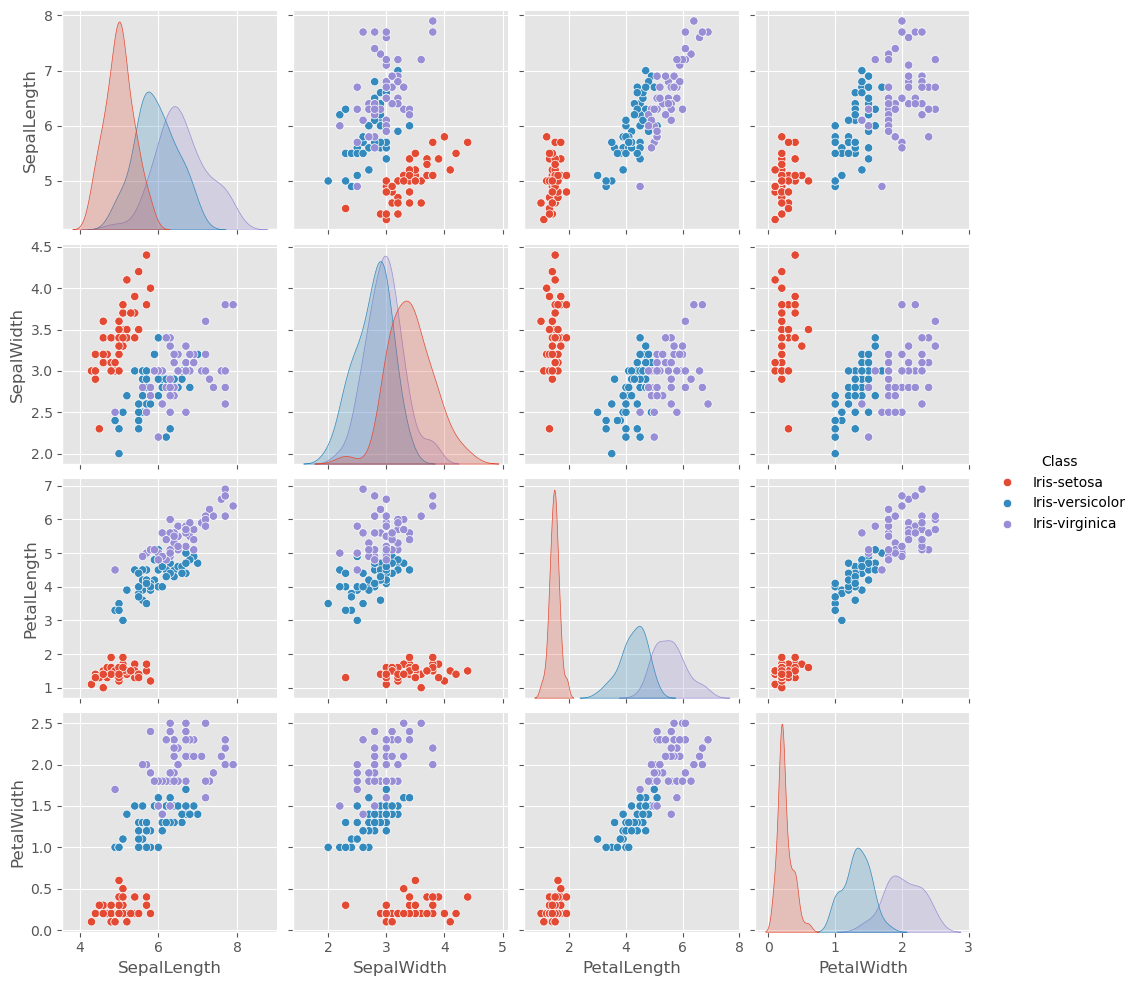

In [126]:
sns.pairplot(data, hue="Class")

#### Get your data in matrix

In [128]:
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())
print (" Data Set Dimensions=", X.shape, " True Class labels dimensions", Y.shape)

 Data Set Dimensions= (149, 4)  True Class labels dimensions (149,)


#### Let's Plot the Data

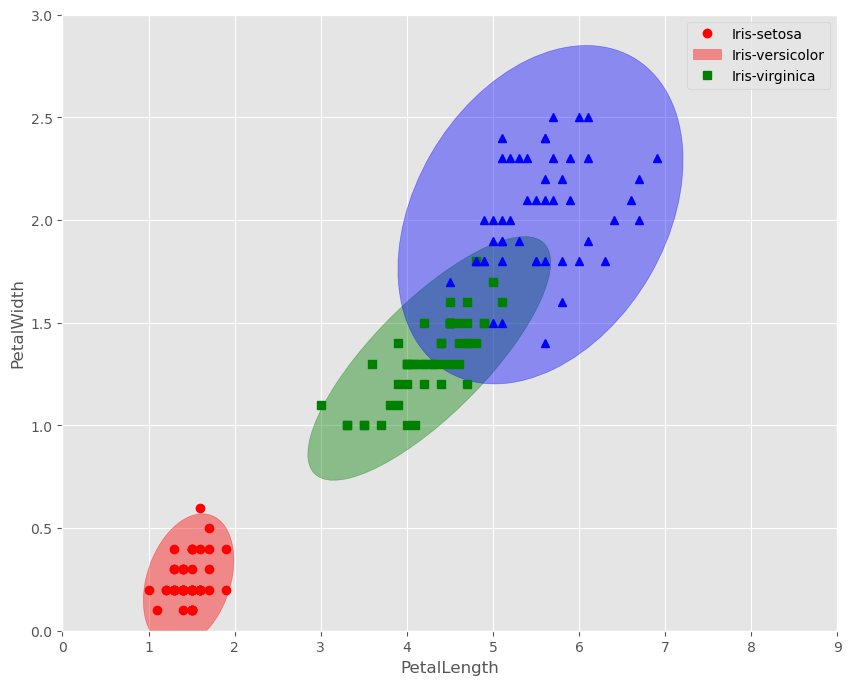

In [132]:
#Lets plot the Complete data, with its covariance matrix...
# Remember seeing is believing
featnames=data.columns
t.plotCov(X[:,2:],Y,labels=featnames.values[2:4]) #red is setosa, green versicolor, blue virhinica

### Splitting the Data into Training and Testing Sets
There must be a validation set but for this case we are using only two sets, training and validation sets...#(training and testing yes?)

In [135]:
# Split your data into training and test-set... 
# see the documentation of split_data in tools for further information...

Xtrain,Ytrain,Xtest,Ytest=t.split_data(X,Y)

print (" Training Data Set Dimensions=", Xtrain.shape, "Training True Class labels dimensions", Ytrain.shape) 
print (" Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytrain.shape)

 Training Data Set Dimensions= (104, 4) Training True Class labels dimensions (104,)
 Test Data Set Dimensions= (45, 4) Test True Class labels dimensions (104,)


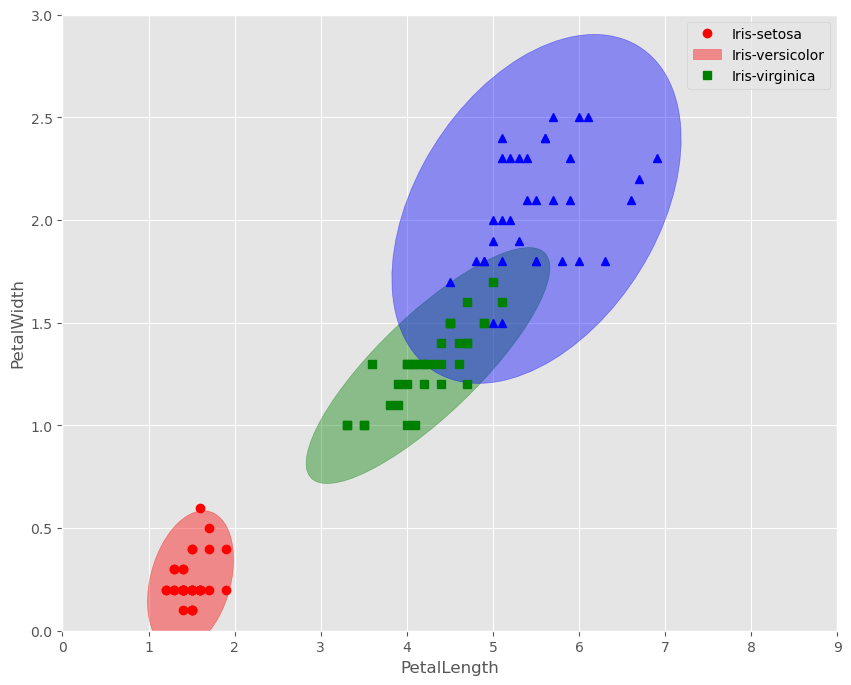

In [137]:
#Lets plot the training data...
t.plotCov(Xtrain[:,2:],Ytrain, labels=featnames.values[2:4])
# so we will be estimating these covariance matrices and means...

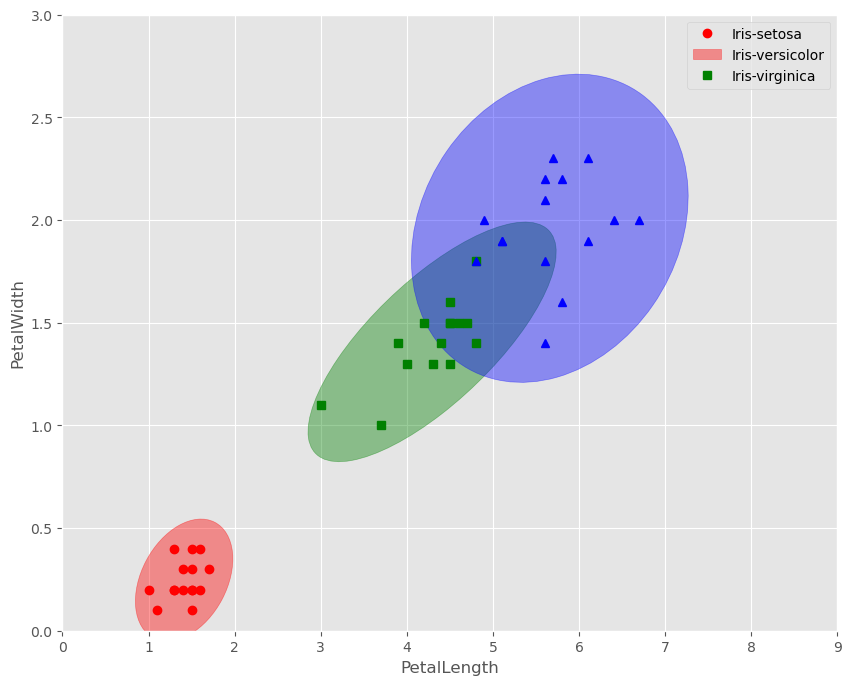

In [139]:
#Lets plot the test data...
t.plotCov(Xtest[:,2:],Ytest,labels=featnames.values[2:4])

Training Time
========
Let's train a Gaussian Bayes, first using two attributes.
- What Two Attributes to use ? Any Guess...

In [142]:
# Lets train a Gaussian Bayes Classifier on Petal Length and Width
gb=GaussianBayes()
gb.train(Xtrain[:,2:],Ytrain)

In [144]:
#Lets test it on the set of unseen examples...

pclasses,res=gb.test(Xtest[:,2:])

C:\Users\mahee\AppData\Local\Temp\ipykernel_25096\572813362.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(fx)


Lets see how good we are doing...
==================

In [167]:
#Lets see how good we are doing...
print (pclasses==Ytest)
print (Ytest.shape[0])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]
45


In [169]:
# Using Just two attributes, accuracy is 

print (np.sum(pclasses==Ytest))
print ("Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0]))

44
Accuracy =  0.9777777777777777


 Plotting the Decision Surface of Training Set... 


C:\Users\mahee\AppData\Local\Temp\ipykernel_25096\572813362.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(fx)


TypeError: Input z must be 2D, not 1D

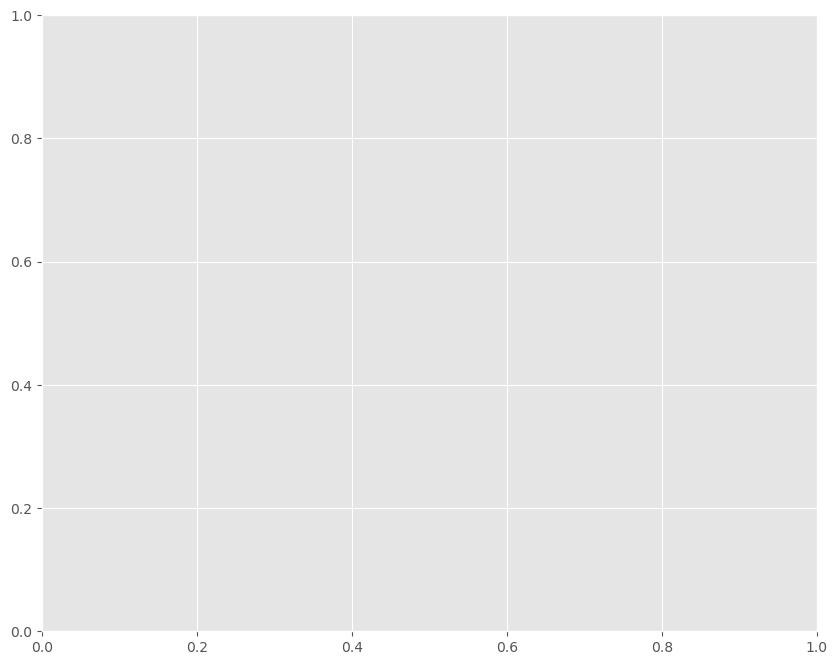

In [171]:
print (" Plotting the Decision Surface of Training Set... ")

t.plot_decision_regions(Xtrain[:,2:],Ytrain,clf=gb, res=0.02, cycle_marker=True, legend=1)


### Test cases for your classifier

In [ ]:
from nose.tools import assert_greater_equal, assert_is_not_none
import pandas as pd
data=pd.read_csv('./iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())

data_val = pd.read_csv('./iris_val.data')
data_val.columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
X_val = np.asarray(data_val[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y_val = np.asarray(data_val['Class'].dropna())

gb_val=GaussianBayes()
gb_val.train(X[:,2:],Y)
pclasses_val, _ = gb_val.test(X_val[:,2:])
acc_val = np.sum(pclasses_val == Y_val) / float(pclasses_val.shape[0])

assert_greater_equal(acc_val, 0.90, msg="Acc must be greater then 90%")

cls =gb_val.predict(np.array([2,2]).reshape((1,2)))
assert_is_not_none(cls, msg="Predict should work for single example")

print("All cases passed !")

## Question: What can you conclude from the above decision Region

# K-Fold Cross Validation

Since our dataset is not too big, to ensure that we are reporting true picture of our classifier, 
we will have to cross validate and report the mean accuracy across the folds to reflect the true 
picture of our classifier.

In [180]:
# Now lets cross validate, and test the result...
nfolds=4
folds=t.generate_folds(X,Y,nfolds)

#now lets train and test on these folds...
totacc=[]
for k in range(nfolds):
    gb=GaussianBayes()
    gb.train(folds[k][0][:,2:],folds[k][1])
    pclasses,res=gb.test(folds[k][2][:,2:])
    acc=np.sum(pclasses==folds[k][3])/float(folds[k][3].shape[0])
    print ("[Info] Fold {} Accuracy = {}".format(k+1, acc))
    totacc.append(acc)

print (totacc, 'Mean Accuracy =', np.mean(totacc))

Generating CV data for 3 classes
[Info] Fold 1 Accuracy = 0.9444444444444444
[Info] Fold 2 Accuracy = 1.0
[Info] Fold 3 Accuracy = 1.0
[Info] Fold 4 Accuracy = 0.9444444444444444
[0.9444444444444444, 1.0, 1.0, 0.9444444444444444] Mean Accuracy = 0.9722222222222223


C:\Users\mahee\AppData\Local\Temp\ipykernel_25096\572813362.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(fx)



Hmm Quite Impressive...
--------------------------------

In [183]:
# Lets go and use all the four attributes...
gb.train(Xtrain,Ytrain)

In [185]:
#pclasses,res=
gb.test(Xtest)

C:\Users\mahee\AppData\Local\Temp\ipykernel_25096\572813362.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(fx)


(array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
        'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
        'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
        'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
        'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
        'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
        'Iris-virginica', 'Iris-virginica'], dtype='<U15'),
 array([8.85352086e-02, 1.12913189e-02, 1.31904565e-01, 6.15070525e-02,
        5.22894718e-0

#### Do you expect your Test accuracy to increase or decrease ?

In [188]:
# Using all four attributes, accuracy is 
print ("Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0]))

ValueError: operands could not be broadcast together with shapes (36,) (45,) 

### Test cases for all four attributes

In [191]:
from nose.tools import assert_greater_equal, assert_is_not_none
import pandas as pd
data=pd.read_csv('./iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())

data_val = pd.read_csv('./iris_val.data')
data_val.columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
X_val = np.asarray(data_val[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y_val = np.asarray(data_val['Class'].dropna())

gb_val=GaussianBayes()
gb_val.train(X,Y)
pclasses_val, _ = gb_val.test(X_val)
acc_val = np.sum(pclasses_val == Y_val) / float(pclasses_val.shape[0])

assert_greater_equal(acc_val, 0.90, msg="Acc must be greater then 90%")

cls =gb_val.predict(np.array([2,2,2,2]).reshape((1,4)))
assert_is_not_none(cls, msg="Predict should work for single example")

print ("All cases passed !")

ModuleNotFoundError: No module named 'imp'

What can you conclude ?
====================

## Let's change the features... 

In [195]:
features=[0, 1]
gb.train(Xtrain[:,features],Ytrain)
pclasses,res=gb.test(Xtest[:,features])
print ("Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0]))

Accuracy =  0.7111111111111111


C:\Users\mahee\AppData\Local\Temp\ipykernel_25096\572813362.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(fx)


Remember Features are the important !!
======================

C:\Users\mahee\AppData\Local\Temp\ipykernel_25096\572813362.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(fx)


TypeError: Input z must be 2D, not 1D

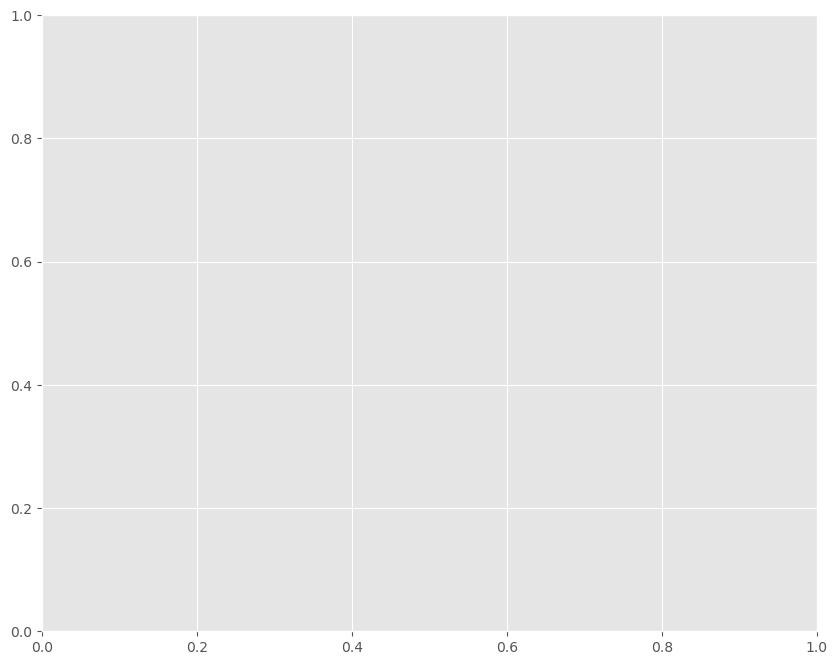

In [198]:
t.plot_decision_regions(Xtest[:,features],Ytest,clf=gb, res=0.02, cycle_marker=True, legend=1)

## Goal: Find the best pair of features (that gives maximum mean cross-validation accuracy) from all the available pairs for the problem in hand

In [201]:
acc = []
gb=GaussianBayes()
for i in range(4):
    for j in range(4):
       if i != j:
           features = [i,j]
           gb.train(Xtrain[:,features],Ytrain)
           pclasses,res=gb.test(Xtest[:,features])
           acc.append((np.sum(pclasses==Ytest)/float(Ytest.shape[0]), (i,j)))
print("Accuracies for all possible pairs: " ,acc)


Accuracies for all possible pairs:  [(0.7111111111111111, (0, 1)), (0.9555555555555556, (0, 2)), (0.9333333333333333, (0, 3)), (0.7111111111111111, (1, 0)), (0.9777777777777777, (1, 2)), (0.9333333333333333, (1, 3)), (0.9555555555555556, (2, 0)), (0.9777777777777777, (2, 1)), (0.9777777777777777, (2, 3)), (0.9333333333333333, (3, 0)), (0.9333333333333333, (3, 1)), (0.9777777777777777, (3, 2))]


C:\Users\mahee\AppData\Local\Temp\ipykernel_25096\572813362.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(fx)


In [ ]:
class GaussianBayes:
    ''' Implements the Gaussian Bayes For Classification... '''
    def __init__(self):
        self.mean = []
        self.cov = []
        self.p_prior = {}
        pass
    def train(self, X, Y):
        ''' Train the multiclass (or Binary) Bayes Rule using the given 
            X [m x n] data matrix and Y labels matrix'''
        
        # YOUR CODE HERE
        # divide into 3 datasets based on output class
        #find mean and covariance matrix with respect to each class of the two features
        # use gaussian function to compute likelihood probability
        # the class with maximum probability will be returned(return both class and probability)
        #raise NotImplementedError()
        # mean of each feature wrt  category
        idx_set = list(np.where(Y == 'Iris-setosa'))
        idx_vir = list(np.where(Y == 'Iris-virginica'))
        idx_ver = list(np.where(Y == 'Iris-versicolor'))
        self.mean = np.array([[X[idx_set, 0].mean(), X[idx_set, 1].mean(), X[idx_set, 2].mean(), X[idx_set, 3].mean()], [X[idx_vir, 0].mean(), X[idx_vir, 1].mean(), X[idx_vir, 2].mean(), X[idx_vir, 3].mean()], [X[idx_ver, 0].mean(), X[idx_ver, 1].mean(), X[idx_ver, 2].mean(), X[idx_ver, 3].mean()]])
        print("Mean point: ", self.mean[0])
        cov1 = np.cov(X[idx_set, :][0], rowvar = False)
        cov2 = np.cov(X[idx_vir, :][0], rowvar = False)
        cov3 = np.cov(X[idx_ver, :][0], rowvar = False)
        self.cov = [cov1, cov2 , cov3]
        
        self.p_prior = dict.fromkeys(np.unique(Y), 0)
        
        for i in np.unique(Y):     #finding prior probabilities
            self.p_prior[i] = len(np.where(Y == i))/ len(Y)
        
        
    def test(self, X):
        
        ''' Run the trained classifiers on the given set of examples 
            For each example, you should return probability and its assigned class
            Input: X of m x d
            Output:
            pclasses: predicted class of each example
            probability: probability of each example falling in that predicted class...
        '''
        #what given examples? Input kese jayega?
        
        # probability of class given feature
        probability = []
        pclasses = []
        for p in X:
            prob = [pdf(self.mean[0],self.cov[0], p ) * self.p_prior['Iris-setosa'], pdf(self.mean[1],self.cov[1], p) * self.p_prior['Iris-virginica'], pdf(self.mean[2],self.cov[2], p ) *  self.p_prior['Iris-versicolor']]
            idx = np.argmax(prob)
            probability.append(prob[idx])
            
            if idx == 0:
                pclasses.append('Iris-setosa')
                
            elif idx == 1:
                pclasses.append('Iris-virginica')
                
            elif idx == 2:
                pclasses.append('Iris-versicolor')
                
            
            
            
        return np.array(pclasses), np.array(probability)   
        # YOUR CODE HERE
        #raise NotImplementedError()
        
    def predict(self, X):
        return self.test(X)[0]
    
gb = GaussianBayes()

In [ ]:
# YOUR CODE HERE
#raise NotImplementedError()


class GaussianBayes:
    ''' Implements the Gaussian Bayes For Classification... '''
    def __init__(self):
        self.mean = []
        self.cov = []
        self.p_prior = {}
        pass
    def train(self, X, Y):
        ''' Train the multiclass (or Binary) Bayes Rule using the given 
            X [m x n] data matrix and Y labels matrix'''
        
        # YOUR CODE HERE
        # divide into 3 datasets based on output class
        #find mean and covariance matrix with respect to each class of the two features
        # use gaussian function to compute likelihood probability
        # the class with maximum probability will be returned(return both class and probability)
        #raise NotImplementedError()
        # mean of each feature wrt  category
        idx_set = list(np.where(Y == 'Iris-setosa'))
        idx_vir = list(np.where(Y == 'Iris-virginica'))
        idx_ver = list(np.where(Y == 'Iris-versicolor'))
        self.mean = np.array([[X[idx_set, 0].mean(),X[idx_set, 1].mean()], [X[idx_vir, 0].mean(), X[idx_vir, 1].mean()], [X[idx_ver, 0].mean(), X[idx_ver, 1].mean()]])
            
        cov1 = np.cov(X[idx_set, :][0], rowvar = False)
        cov2 = np.cov(X[idx_vir, :][0], rowvar = False)
        cov3 = np.cov(X[idx_ver, :][0], rowvar = False)
        self.cov = [cov1, cov2 , cov3]
        
        self.p_prior = dict.fromkeys(np.unique(Y), 0)
        
        for i in np.unique(Y):     #finding prior probabilities
            self.p_prior[i] = len(np.where(Y == i))/ len(Y)
        
        
    def test(self, X):
        
        ''' Run the trained classifiers on the given set of examples 
            For each example, you should return probability and its assigned class
            Input: X of m x d
            Output:
            pclasses: predicted class of each example
            probability: probability of each example falling in that predicted class...
        '''
        #what given examples? Input kese jayega?
        
        # probability of class given feature
        probability = []
        pclasses = []
        for p in X:
            prob = [pdf(self.mean[0],self.cov[0], p ) * self.p_prior['Iris-setosa'], pdf(self.mean[1],self.cov[1], p) * self.p_prior['Iris-virginica'], pdf(self.mean[2],self.cov[2], p ) *  self.p_prior['Iris-versicolor']]
            idx = np.argmax(prob)
            probability.append(prob[idx])
            
            if idx == 0:
                pclasses.append('Iris-setosa')
                
            elif idx == 1:
                pclasses.append('Iris-virginica')
                
            elif idx == 2:
                pclasses.append('Iris-versicolor')
                
            
            
            
        return np.array(pclasses), np.array(probability)   
        # YOUR CODE HERE
        #raise NotImplementedError()
        
    def predict(self, X):
        return self.test(X)[0]    